In [1]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 2000)

## New York

New York data download from here: https://data.ny.gov/Transportation/Vehicle-Snowmobile-and-Boat-Registrations/w4pv-hbkt

In [2]:
ny_reg = pd.read_csv('../data/ny/20210111_ny_vehicle_registrations.csv')

ny_reg['reg_valid_date'] = pd.to_datetime(ny_reg['Reg Valid Date'])
ny_reg['reg_exp_date'] = pd.to_datetime(ny_reg['Reg Expiration Date'])

ny_reg['reg_valid_month'] = ny_reg['reg_valid_date'].dt.month
ny_reg['reg_valid_year'] = ny_reg['reg_valid_date'].dt.year

ny_veh = ny_reg.loc[ny_reg['Record Type'] == 'VEH']

/Users/akanik/.local/share/virtualenvs/car-free-cities-Oj_SXpK8/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (16) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
ny_veh.dtypes

Record Type                     object
VIN                             object
Registration Class              object
City                            object
State                           object
Zip                              int64
County                          object
Model Year                     float64
Make                            object
Body Type                       object
Fuel Type                       object
Unladen Weight                 float64
Maximum Gross Weight           float64
Passengers                     float64
Reg Valid Date                  object
Reg Expiration Date             object
Color                           object
Scofflaw Indicator              object
Suspension Indicator            object
Revocation Indicator            object
reg_valid_date          datetime64[ns]
reg_exp_date            datetime64[ns]
reg_valid_month                  int64
reg_valid_year                   int64
dtype: object

In [5]:
ny_veh.columns[ny_veh.isna().any()].tolist()

['VIN',
 'Make',
 'Unladen Weight',
 'Maximum Gross Weight',
 'Passengers',
 'Reg Expiration Date',
 'reg_exp_date']

In [8]:
len(ny_veh.loc[ny_veh['reg_exp_date'].isna()])

193108

In [12]:
ny_veh.loc[ny_veh['reg_exp_date'].isna()].sort_values('reg_valid_date').tail()

,Record Type,VIN,Registration Class,City,State,Zip,County,Model Year,Make,Body Type,Fuel Type,Unladen Weight,Maximum Gross Weight,Passengers,Reg Valid Date,Reg Expiration Date,Color,Scofflaw Indicator,Suspension Indicator,Revocation Indicator,reg_valid_date,reg_exp_date,reg_valid_month,reg_valid_year
2768225,VEH,1GC4YPE72MF109006,PSD,BAYSHORE,NY,11706,SUFFOLK,2021.0,CHEVR,PICK,GAS,7032.0,NaN,NaN,11/30/2020,NaN,RD,N,N,N,2020-11-30,NaT,11,2020
1402749,VEH,5JXCT16233S031163,PSD,LYONS,NY,14489,WAYNE,2003.0,TN/TR,TRLR,NONE,7000.0,NaN,NaN,11/30/2020,NaN,WH,N,N,N,2020-11-30,NaT,11,2020
2119597,VEH,3ALACYFE1MDMN4739,PSD,ARMONK,NY,10504,WESTCHESTER,2021.0,FREIG,DUMP,DIESEL,18300.0,NaN,NaN,11/30/2020,NaN,WH,N,N,N,2020-11-30,NaT,11,2020
4212475,VEH,2S9US4119LS132372,PSD,CORONA,NY,11368,QUEENS,2020.0,VERMA,TRLR,NONE,1260.0,NaN,NaN,11/30/2020,NaN,OR,N,N,N,2020-11-30,NaT,11,2020
3211810,VEH,1FTER4FH5LLA95478,PSD,LIVERPOOL,NY,13088,ONONDAGA,2020.0,FORD,PICK,GAS,6500.0,NaN,NaN,11/30/2020,NaN,RD,N,N,N,2020-11-30,NaT,11,2020


In [6]:
ny_veh.head()

,Record Type,VIN,Registration Class,City,State,Zip,County,Model Year,Make,Body Type,Fuel Type,Unladen Weight,Maximum Gross Weight,Passengers,Reg Valid Date,Reg Expiration Date,Color,Scofflaw Indicator,Suspension Indicator,Revocation Indicator,reg_valid_date,reg_exp_date,reg_valid_month,reg_valid_year
0,VEH,5NPEC4AC9BH056988,PAS,DEPEW,NY,14043,ERIE,2011.0,HYUND,4DSD,GAS,3316.0,NaN,NaN,09/24/2020,09/23/2022,GY,N,N,N,2020-09-24,2022-09-23,9,2020
1,VEH,5N1AR2MM2EC732280,PAS,GLENVILLE,NY,12302,SCHENECTADY,2014.0,NISSA,SUBN,GAS,4262.0,NaN,NaN,05/06/2019,05/15/2021,GY,N,N,N,2019-05-06,2021-05-15,5,2019
2,VEH,5N1AR2MM2EC732277,PAS,MASSAPEQUA,NY,11762,NASSAU,2014.0,NISSA,SUBN,GAS,4262.0,NaN,NaN,06/11/2019,08/29/2021,BK,N,N,N,2019-06-11,2021-08-29,6,2019
3,VEH,5N1AR2MM2EC731100,PAS,STATEN ISLAND,NY,10305,RICHMOND,2014.0,NISSA,SUBN,GAS,4200.0,NaN,NaN,09/18/2020,09/12/2022,GY,N,N,N,2020-09-18,2022-09-12,9,2020
4,VEH,5N1AR2MM2EC730951,PAS,MANLIUS,NY,13104,ONONDAGA,2014.0,NISSA,SUBN,GAS,4384.0,NaN,NaN,10/20/2020,11/24/2022,RD,N,N,N,2020-10-20,2022-11-24,10,2020


In [7]:
ny_veh['reg_valid_date'].max()

Timestamp('2021-02-01 00:00:00')

In [ ]:
len(ny_veh)

In [ ]:
ny_veh['State'].unique()

In [ ]:
ny_veh.groupby('State')['Record Type'].count()

In [13]:
ny_only = ny_veh.loc[ny_veh['State'] == 'NY'].sort_values('City')
list(ny_only.City.unique())

['-',
 '0CEANSIDE',
 '14E BRONX',
 '201 E 2ND JMST',
 '87',
 'A BABYLON',
 'AAMHERST',
 'AASTORIA',
 'ABANY',
 'ABERTSON',
 'ABINGTON PL',
 'ABLANY',
 'ABLION',
 'ABOOKLYN',
 'ABRDONIA',
 'ABURN',
 'ACCORD',
 'ACCORD NY',
 'ACCPRD',
 'ACEAT NECK',
 'ACENX',
 'ACKSON HEIGHTS',
 'ACMDEN',
 'ACORD',
 'ACRA',
 'ACRAM',
 'ACREDE',
 'ADAM',
 'ADAM CENTER',
 'ADAMS',
 'ADAMS BASIN',
 'ADAMS CANTER',
 'ADAMS CE NTER',
 'ADAMS CENTER',
 'ADAMS CNTR',
 'ADAMS CT',
 'ADAMS CTR',
 'ADDDISON',
 'ADDESLEIGH PAR',
 'ADDESLEIGH PK',
 'ADDISIEIGH PK',
 'ADDISLEIGH',
 'ADDISLEIGH PAR',
 'ADDISLEIGH PK',
 'ADDISLEIGH PRK',
 'ADDISON',
 'ADDISSON',
 'ADDSION',
 'ADIRNDACK',
 'ADIRONACK',
 'ADIRONDACK',
 'ADIRONDICK',
 'ADIRONDOCK',
 'ADISON',
 'ADLER CREEK',
 'ADLFRED',
 'ADMAS',
 'ADNASTOTA',
 'ADNE ISLAND',
 'ADNES',
 'ADOW',
 'ADOWS',
 'ADRCELLUS',
 'ADRCHASE',
 'ADRIONDACK',
 'ADRNING',
 'ADST CHAZY',
 'ADTORIA',
 'AELEGANY',
 'AEVERNE',
 'AEW YORK',
 'AFLRED',
 'AFLRED STATION',
 'AFRED STATION',
 'A

In [ ]:
ny_only.groupby('City')['Record Type'].count().reset_index().to_csv('../data/ny/ny_city_cleanup.csv')

In [14]:
nyc_zips = pd.read_csv('../data/ny/nyc_zips.txt')
nyc_zips_list = list(nyc_zips['ZIP Codes'].unique())

print(len(nyc_zips))
print(len(nyc_zips_list))

178
178


In [15]:
nyc_veh = ny_veh.loc[ny_veh['Zip'].isin(nyc_zips_list)]

In [18]:
nyc_solid = nyc_veh.loc[(nyc_veh['reg_valid_year']> 2017)&(nyc_veh['reg_valid_date']< '2020-12-01')]
nyc_by_month = nyc_solid.groupby(['reg_valid_year','reg_valid_month'])['Record Type'].count().reset_index()

nyc_by_month['year_month'] = nyc_by_month['reg_valid_month'].astype(str) + '-' + nyc_by_month['reg_valid_year'].astype(str)

<AxesSubplot:xlabel='year_month'>

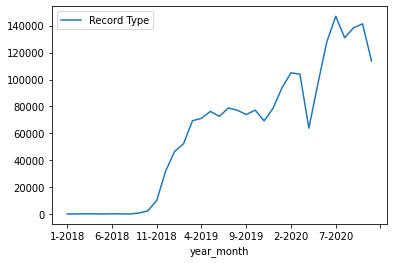

In [19]:
nyc_by_month.plot(x='year_month', y='Record Type')

In [20]:
nyc_by_month

,reg_valid_year,reg_valid_month,Record Type,year_month
0,2018,1,195,1-2018
1,2018,2,225,2-2018
2,2018,3,319,3-2018
3,2018,4,299,4-2018
4,2018,5,176,5-2018
5,2018,6,330,6-2018
6,2018,7,261,7-2018
7,2018,8,207,8-2018
8,2018,9,878,9-2018
9,2018,10,2493,10-2018
